In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
account_activity = pd.read_csv("Data/Customer Profiles/account_activity.csv")
customer_data = pd.read_csv("Data/Customer Profiles/customer_data.csv")
fraud_indicator = pd.read_csv("Data/Fraudulent Patterns/fraud_indicators.csv")
suspicious_activity = pd.read_csv("Data/Fraudulent Patterns/suspicious_activity.csv")
merchant_data = pd.read_csv("Data/Merchant Information/merchant_data.csv")
transaction_category_labels = pd.read_csv("Data/Merchant Information/transaction_category_labels.csv")
amount_data = pd.read_csv("Data/Transaction Amounts/amount_data.csv")
anomaly_scores = pd.read_csv("Data/Transaction Amounts/anomaly_scores.csv")
transaction_metadata = pd.read_csv("Data/Transaction Data/transaction_metadata.csv")
transaction_records = pd.read_csv("Data/Transaction Data/transaction_records.csv")

In [3]:
data = [account_activity,customer_data,fraud_indicator,suspicious_activity,merchant_data,transaction_category_labels,amount_data,anomaly_scores,transaction_metadata,transaction_records]

In [4]:
for df in data:
    print(df.head())

   CustomerID  AccountBalance   LastLogin
0        1001     9507.272060  2022-01-01
1        1002     7408.704536  2022-01-02
2        1003     1715.321989  2022-01-03
3        1004     3101.509134  2022-01-04
4        1005     5405.766914  2022-01-05
   CustomerID           Name  Age       Address
0        1001  Customer 1001   54  Address 1001
1        1002  Customer 1002   35  Address 1002
2        1003  Customer 1003   40  Address 1003
3        1004  Customer 1004   30  Address 1004
4        1005  Customer 1005   46  Address 1005
   TransactionID  FraudIndicator
0              1               0
1              2               0
2              3               0
3              4               0
4              5               0
   CustomerID  SuspiciousFlag
0        1001               0
1        1002               0
2        1003               0
3        1004               0
4        1005               0
   MerchantID   MerchantName       Location
0        2001  Merchant 2001  Location

In [5]:
customer_data = pd.merge(customer_data, account_activity, on='CustomerID')
customer_data = pd.merge(customer_data, suspicious_activity, on='CustomerID')

In [6]:
customer_data

,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1001,Customer 1001,54,Address 1001,9507.272060,2022-01-01,0
1,1002,Customer 1002,35,Address 1002,7408.704536,2022-01-02,0
2,1003,Customer 1003,40,Address 1003,1715.321989,2022-01-03,0
3,1004,Customer 1004,30,Address 1004,3101.509134,2022-01-04,0
4,1005,Customer 1005,46,Address 1005,5405.766914,2022-01-05,0
...,...,...,...,...,...,...,...
995,1996,Customer 1996,33,Address 1996,8523.485163,2024-09-22,0
996,1997,Customer 1997,58,Address 1997,9255.451757,2024-09-23,0
997,1998,Customer 1998,25,Address 1998,9148.652759,2024-09-24,0
998,1999,Customer 1999,57,Address 1999,7376.854107,2024-09-25,0


In [7]:
transaction_data = pd.merge(fraud_indicator, transaction_category_labels,on='TransactionID')
transaction_data = pd.merge(transaction_data,amount_data ,on='TransactionID')
transaction_data = pd.merge(transaction_data,anomaly_scores ,on='TransactionID')
transaction_data = pd.merge(transaction_data,transaction_metadata ,on='TransactionID')
transaction_data = pd.merge(transaction_data,transaction_records ,on='TransactionID')
transaction_data

,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID
0,1,0,Other,79.413607,0.686699,01-01-2022 00:00,2701,55.530334,1952
1,2,0,Online,12.053087,0.081749,01-01-2022 01:00,2070,12.881180,1027
2,3,0,Travel,33.310357,0.023857,01-01-2022 02:00,2238,50.176322,1955
3,4,0,Travel,46.121117,0.876994,01-01-2022 03:00,2879,41.634001,1796
4,5,0,Other,54.051618,0.034059,01-01-2022 04:00,2966,78.122853,1946
...,...,...,...,...,...,...,...,...,...
995,996,0,Food,89.457059,0.266778,11-02-2022 11:00,2150,19.876750,1411
996,997,0,Retail,47.958030,0.512483,11-02-2022 12:00,2888,96.299792,1566
997,998,0,Food,64.210046,0.367740,11-02-2022 13:00,2037,75.164459,1654
998,999,0,Travel,64.684167,0.960364,11-02-2022 14:00,2629,93.633040,1928


In [8]:
customer_data

,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1001,Customer 1001,54,Address 1001,9507.272060,2022-01-01,0
1,1002,Customer 1002,35,Address 1002,7408.704536,2022-01-02,0
2,1003,Customer 1003,40,Address 1003,1715.321989,2022-01-03,0
3,1004,Customer 1004,30,Address 1004,3101.509134,2022-01-04,0
4,1005,Customer 1005,46,Address 1005,5405.766914,2022-01-05,0
...,...,...,...,...,...,...,...
995,1996,Customer 1996,33,Address 1996,8523.485163,2024-09-22,0
996,1997,Customer 1997,58,Address 1997,9255.451757,2024-09-23,0
997,1998,Customer 1998,25,Address 1998,9148.652759,2024-09-24,0
998,1999,Customer 1999,57,Address 1999,7376.854107,2024-09-25,0


In [9]:
transaction_data

,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID
0,1,0,Other,79.413607,0.686699,01-01-2022 00:00,2701,55.530334,1952
1,2,0,Online,12.053087,0.081749,01-01-2022 01:00,2070,12.881180,1027
2,3,0,Travel,33.310357,0.023857,01-01-2022 02:00,2238,50.176322,1955
3,4,0,Travel,46.121117,0.876994,01-01-2022 03:00,2879,41.634001,1796
4,5,0,Other,54.051618,0.034059,01-01-2022 04:00,2966,78.122853,1946
...,...,...,...,...,...,...,...,...,...
995,996,0,Food,89.457059,0.266778,11-02-2022 11:00,2150,19.876750,1411
996,997,0,Retail,47.958030,0.512483,11-02-2022 12:00,2888,96.299792,1566
997,998,0,Food,64.210046,0.367740,11-02-2022 13:00,2037,75.164459,1654
998,999,0,Travel,64.684167,0.960364,11-02-2022 14:00,2629,93.633040,1928


In [10]:
merchant_data

,MerchantID,MerchantName,Location
0,2001,Merchant 2001,Location 2001
1,2002,Merchant 2002,Location 2002
2,2003,Merchant 2003,Location 2003
3,2004,Merchant 2004,Location 2004
4,2005,Merchant 2005,Location 2005
...,...,...,...
995,2996,Merchant 2996,Location 2996
996,2997,Merchant 2997,Location 2997
997,2998,Merchant 2998,Location 2998
998,2999,Merchant 2999,Location 2999


In [11]:
data = pd.merge(transaction_data, customer_data, on="CustomerID")
data = pd.merge(data, merchant_data, on='MerchantID')
data

,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag,MerchantName,Location
0,1,0,Other,79.413607,0.686699,01-01-2022 00:00,2701,55.530334,1952,Customer 1952,50,Address 1952,2869.689912,2024-08-09,0,Merchant 2701,Location 2701
1,914,0,Other,94.931704,0.856704,08-02-2022 01:00,2701,96.523142,1009,Customer 1009,32,Address 1009,5359.747810,2022-01-09,0,Merchant 2701,Location 2701
2,895,0,Food,90.422026,0.040817,07-02-2022 06:00,2149,53.683898,1952,Customer 1952,50,Address 1952,2869.689912,2024-08-09,0,Merchant 2149,Location 2149
3,2,0,Online,12.053087,0.081749,01-01-2022 01:00,2070,12.881180,1027,Customer 1027,46,Address 1027,9527.947107,2022-01-27,0,Merchant 2070,Location 2070
4,747,0,Food,96.272788,0.139599,01-02-2022 02:00,2070,66.245435,1581,Customer 1581,41,Address 1581,8128.017215,2023-08-04,0,Merchant 2070,Location 2070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,973,0,Food,14.161747,0.399450,10-02-2022 12:00,2396,40.390329,1661,Customer 1661,34,Address 1661,4915.427164,2023-10-23,0,Merchant 2396,Location 2396
996,980,0,Travel,36.021252,0.507261,10-02-2022 19:00,2666,59.308867,1421,Customer 1421,41,Address 1421,6341.743797,2023-02-25,0,Merchant 2666,Location 2666
997,984,0,Online,34.489507,0.169398,10-02-2022 23:00,2593,49.450072,1884,Customer 1884,55,Address 1884,6010.648922,2024-06-02,0,Merchant 2593,Location 2593
998,989,0,Food,17.848481,0.029543,11-02-2022 04:00,2284,20.443811,1312,Customer 1312,26,Address 1312,6018.443647,2022-11-08,0,Merchant 2284,Location 2284


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      1000 non-null   int64  
 1   FraudIndicator     1000 non-null   int64  
 2   Category           1000 non-null   object 
 3   TransactionAmount  1000 non-null   float64
 4   AnomalyScore       1000 non-null   float64
 5   Timestamp          1000 non-null   object 
 6   MerchantID         1000 non-null   int64  
 7   Amount             1000 non-null   float64
 8   CustomerID         1000 non-null   int64  
 9   Name               1000 non-null   object 
 10  Age                1000 non-null   int64  
 11  Address            1000 non-null   object 
 12  AccountBalance     1000 non-null   float64
 13  LastLogin          1000 non-null   object 
 14  SuspiciousFlag     1000 non-null   int64  
 15  MerchantName       1000 non-null   object 
 16  Location           1000 n

In [13]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TransactionID,1000.0,500.500000,288.819436,1.000000,250.750000,500.500000,750.250000,1000.000000
FraudIndicator,1000.0,0.045000,0.207408,0.000000,0.000000,0.000000,0.000000,1.000000
TransactionAmount,1000.0,55.853826,26.093606,10.057864,33.875129,55.958313,77.589391,99.784323
AnomalyScore,1000.0,0.492282,0.288423,0.000234,0.251802,0.490242,0.741888,0.999047
MerchantID,1000.0,2504.701000,288.414883,2001.000000,2254.500000,2500.500000,2761.250000,3000.000000
Amount,1000.0,55.394871,25.070809,10.006933,34.502315,57.844325,75.858576,99.887410
CustomerID,1000.0,1496.626000,289.229047,1001.000000,1239.000000,1501.000000,1739.250000,2000.000000
Age,1000.0,39.848000,13.074932,18.000000,29.000000,39.000000,51.000000,64.000000
AccountBalance,1000.0,5715.455931,2540.517262,1056.301181,3489.554711,5753.007775,7925.710167,9999.776239
SuspiciousFlag,1000.0,0.025000,0.156203,0.000000,0.000000,0.000000,0.000000,1.000000


<Axes: xlabel='SuspiciousFlag', ylabel='count'>

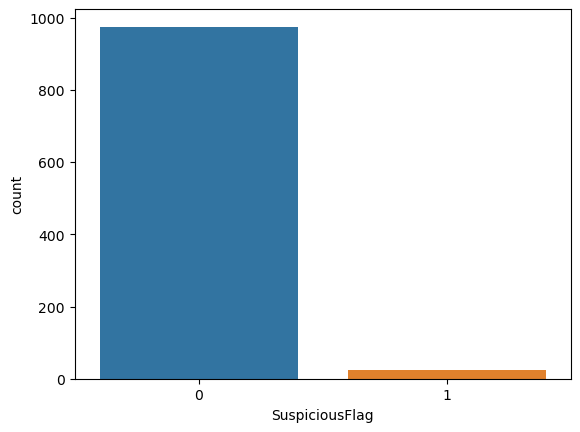

In [14]:
sns.countplot(x="SuspiciousFlag", data=data)

<Axes: xlabel='Category', ylabel='count'>

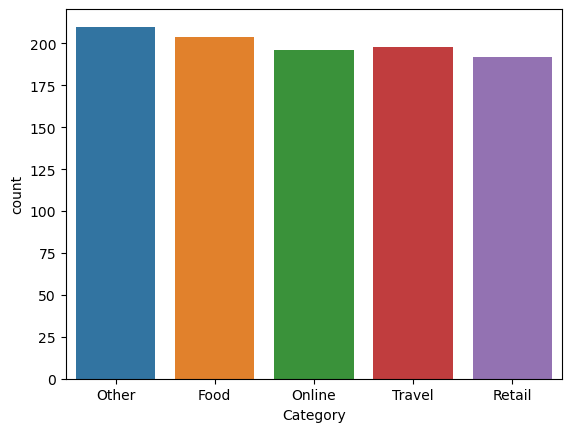

In [15]:
sns.countplot(x="Category", data=data)

<Axes: xlabel='Category', ylabel='Amount'>

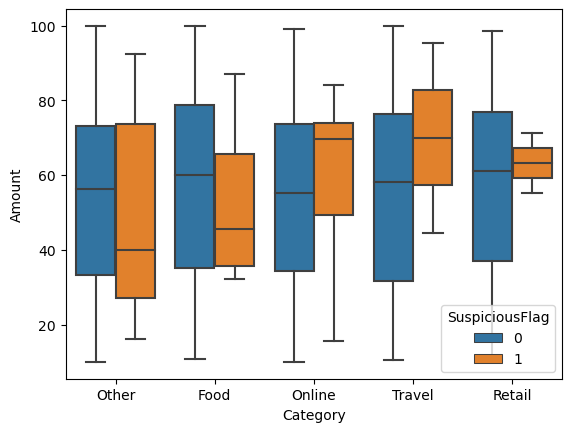

In [16]:
sns.boxplot(data=data, x="Category", y="Amount", hue="SuspiciousFlag")

<Axes: xlabel='Amount', ylabel='AnomalyScore'>

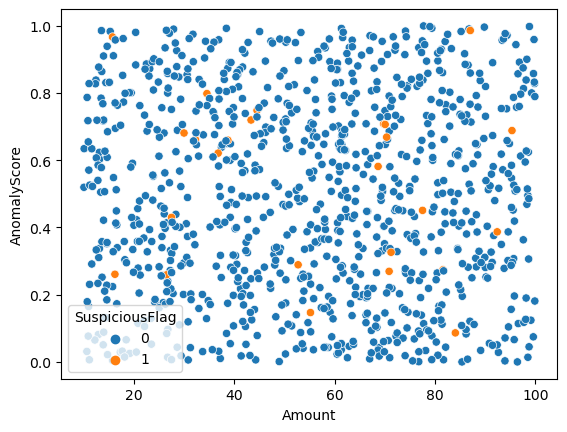

In [17]:
sns.scatterplot(data=data, x="Amount", y="AnomalyScore", hue="SuspiciousFlag")

<Axes: xlabel='AccountBalance', ylabel='AnomalyScore'>

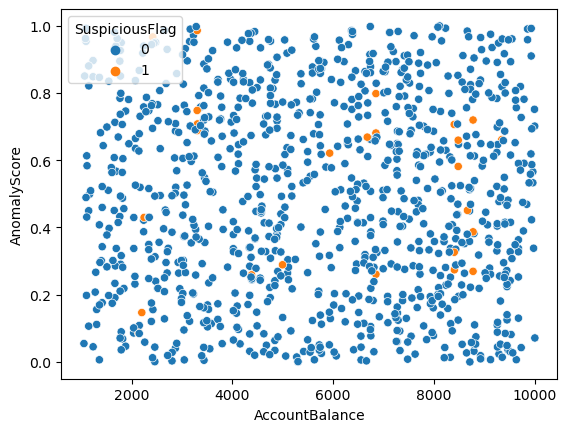

In [18]:
sns.scatterplot(data=data, x="AccountBalance", y="AnomalyScore", hue="SuspiciousFlag")

<Axes: xlabel='AccountBalance', ylabel='AnomalyScore'>

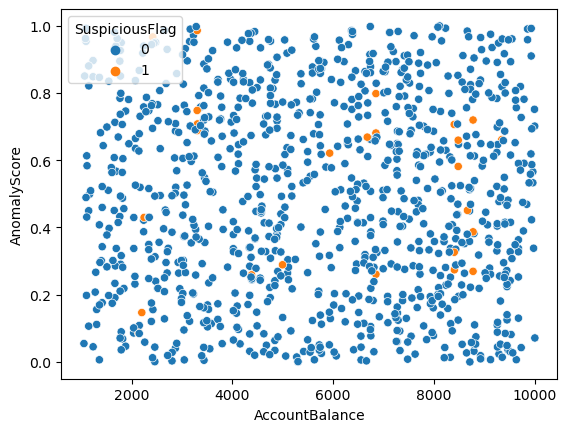

In [19]:
sns.scatterplot(data=data, x="AccountBalance", y="AnomalyScore", hue="SuspiciousFlag")

In [20]:
# data = data.drop([])
# pd.get_dummies(data=data)

<Axes: >

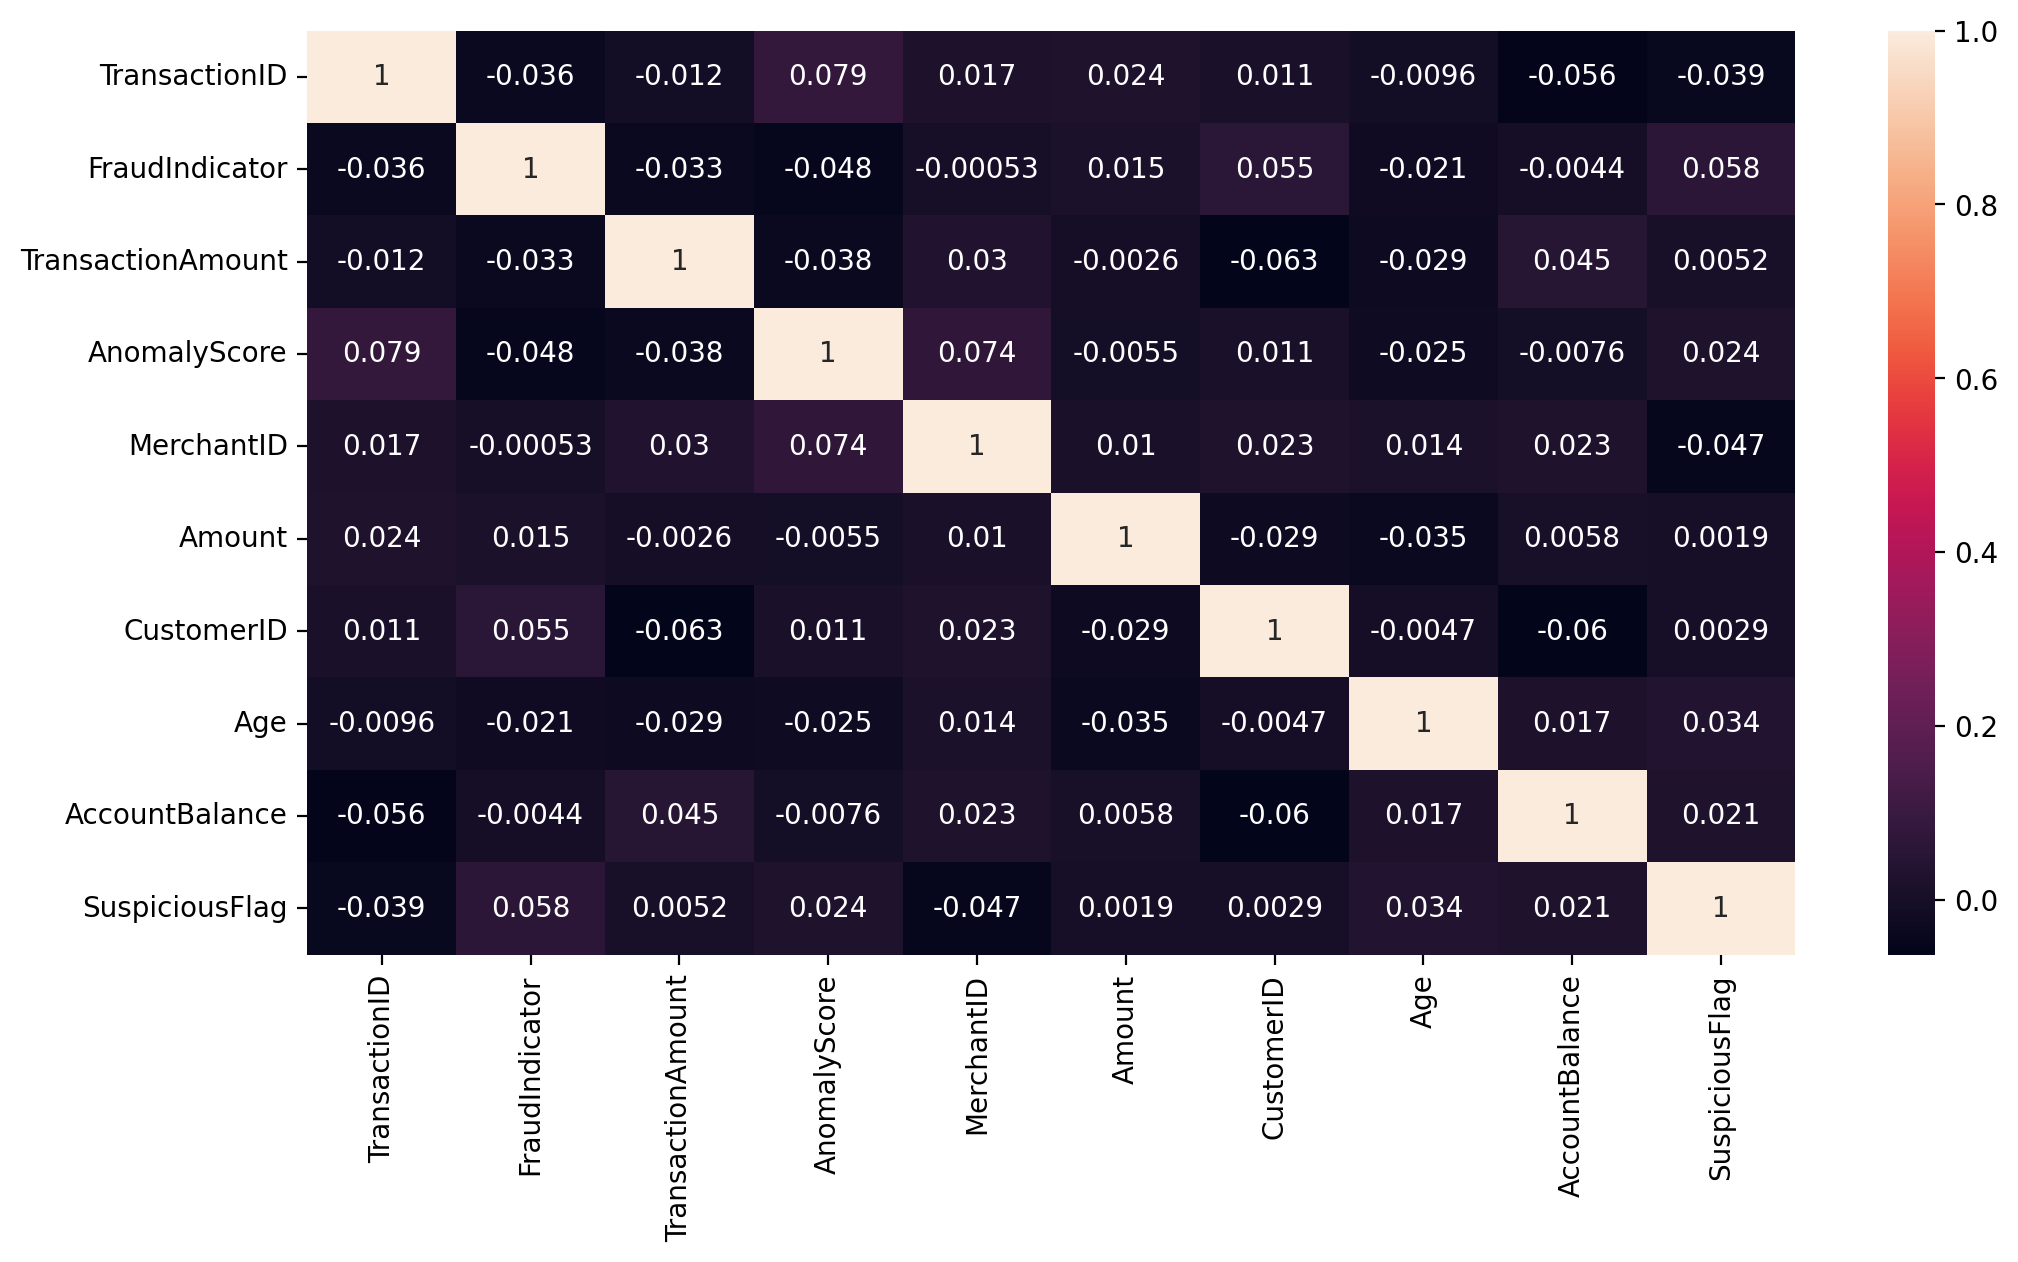

In [21]:
plt.figure(figsize=(12,6), dpi=200)

sns.heatmap(data[["TransactionID","FraudIndicator","TransactionAmount","AnomalyScore","MerchantID","Amount","CustomerID","Age","AccountBalance","SuspiciousFlag"]].corr(),annot=True)

In [22]:
data = pd.get_dummies(columns=["Category"],data=data,drop_first=True)
data

,TransactionID,FraudIndicator,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag,MerchantName,Location,Category_Online,Category_Other,Category_Retail,Category_Travel
0,1,0,79.413607,0.686699,01-01-2022 00:00,2701,55.530334,1952,Customer 1952,50,Address 1952,2869.689912,2024-08-09,0,Merchant 2701,Location 2701,False,True,False,False
1,914,0,94.931704,0.856704,08-02-2022 01:00,2701,96.523142,1009,Customer 1009,32,Address 1009,5359.747810,2022-01-09,0,Merchant 2701,Location 2701,False,True,False,False
2,895,0,90.422026,0.040817,07-02-2022 06:00,2149,53.683898,1952,Customer 1952,50,Address 1952,2869.689912,2024-08-09,0,Merchant 2149,Location 2149,False,False,False,False
3,2,0,12.053087,0.081749,01-01-2022 01:00,2070,12.881180,1027,Customer 1027,46,Address 1027,9527.947107,2022-01-27,0,Merchant 2070,Location 2070,True,False,False,False
4,747,0,96.272788,0.139599,01-02-2022 02:00,2070,66.245435,1581,Customer 1581,41,Address 1581,8128.017215,2023-08-04,0,Merchant 2070,Location 2070,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,973,0,14.161747,0.399450,10-02-2022 12:00,2396,40.390329,1661,Customer 1661,34,Address 1661,4915.427164,2023-10-23,0,Merchant 2396,Location 2396,False,False,False,False
996,980,0,36.021252,0.507261,10-02-2022 19:00,2666,59.308867,1421,Customer 1421,41,Address 1421,6341.743797,2023-02-25,0,Merchant 2666,Location 2666,False,False,False,True
997,984,0,34.489507,0.169398,10-02-2022 23:00,2593,49.450072,1884,Customer 1884,55,Address 1884,6010.648922,2024-06-02,0,Merchant 2593,Location 2593,True,False,False,False
998,989,0,17.848481,0.029543,11-02-2022 04:00,2284,20.443811,1312,Customer 1312,26,Address 1312,6018.443647,2022-11-08,0,Merchant 2284,Location 2284,False,False,False,False


In [23]:
corr = data[["TransactionID","FraudIndicator","TransactionAmount","AnomalyScore","MerchantID","Amount","CustomerID","Age","AccountBalance","SuspiciousFlag"]].corr()['FraudIndicator'].sort_values()[:-1]
corr

AnomalyScore        -0.048198
TransactionID       -0.035885
TransactionAmount   -0.033456
Age                 -0.021468
AccountBalance      -0.004391
MerchantID          -0.000528
Amount               0.014625
CustomerID           0.055430
SuspiciousFlag       0.057932
Name: FraudIndicator, dtype: float64

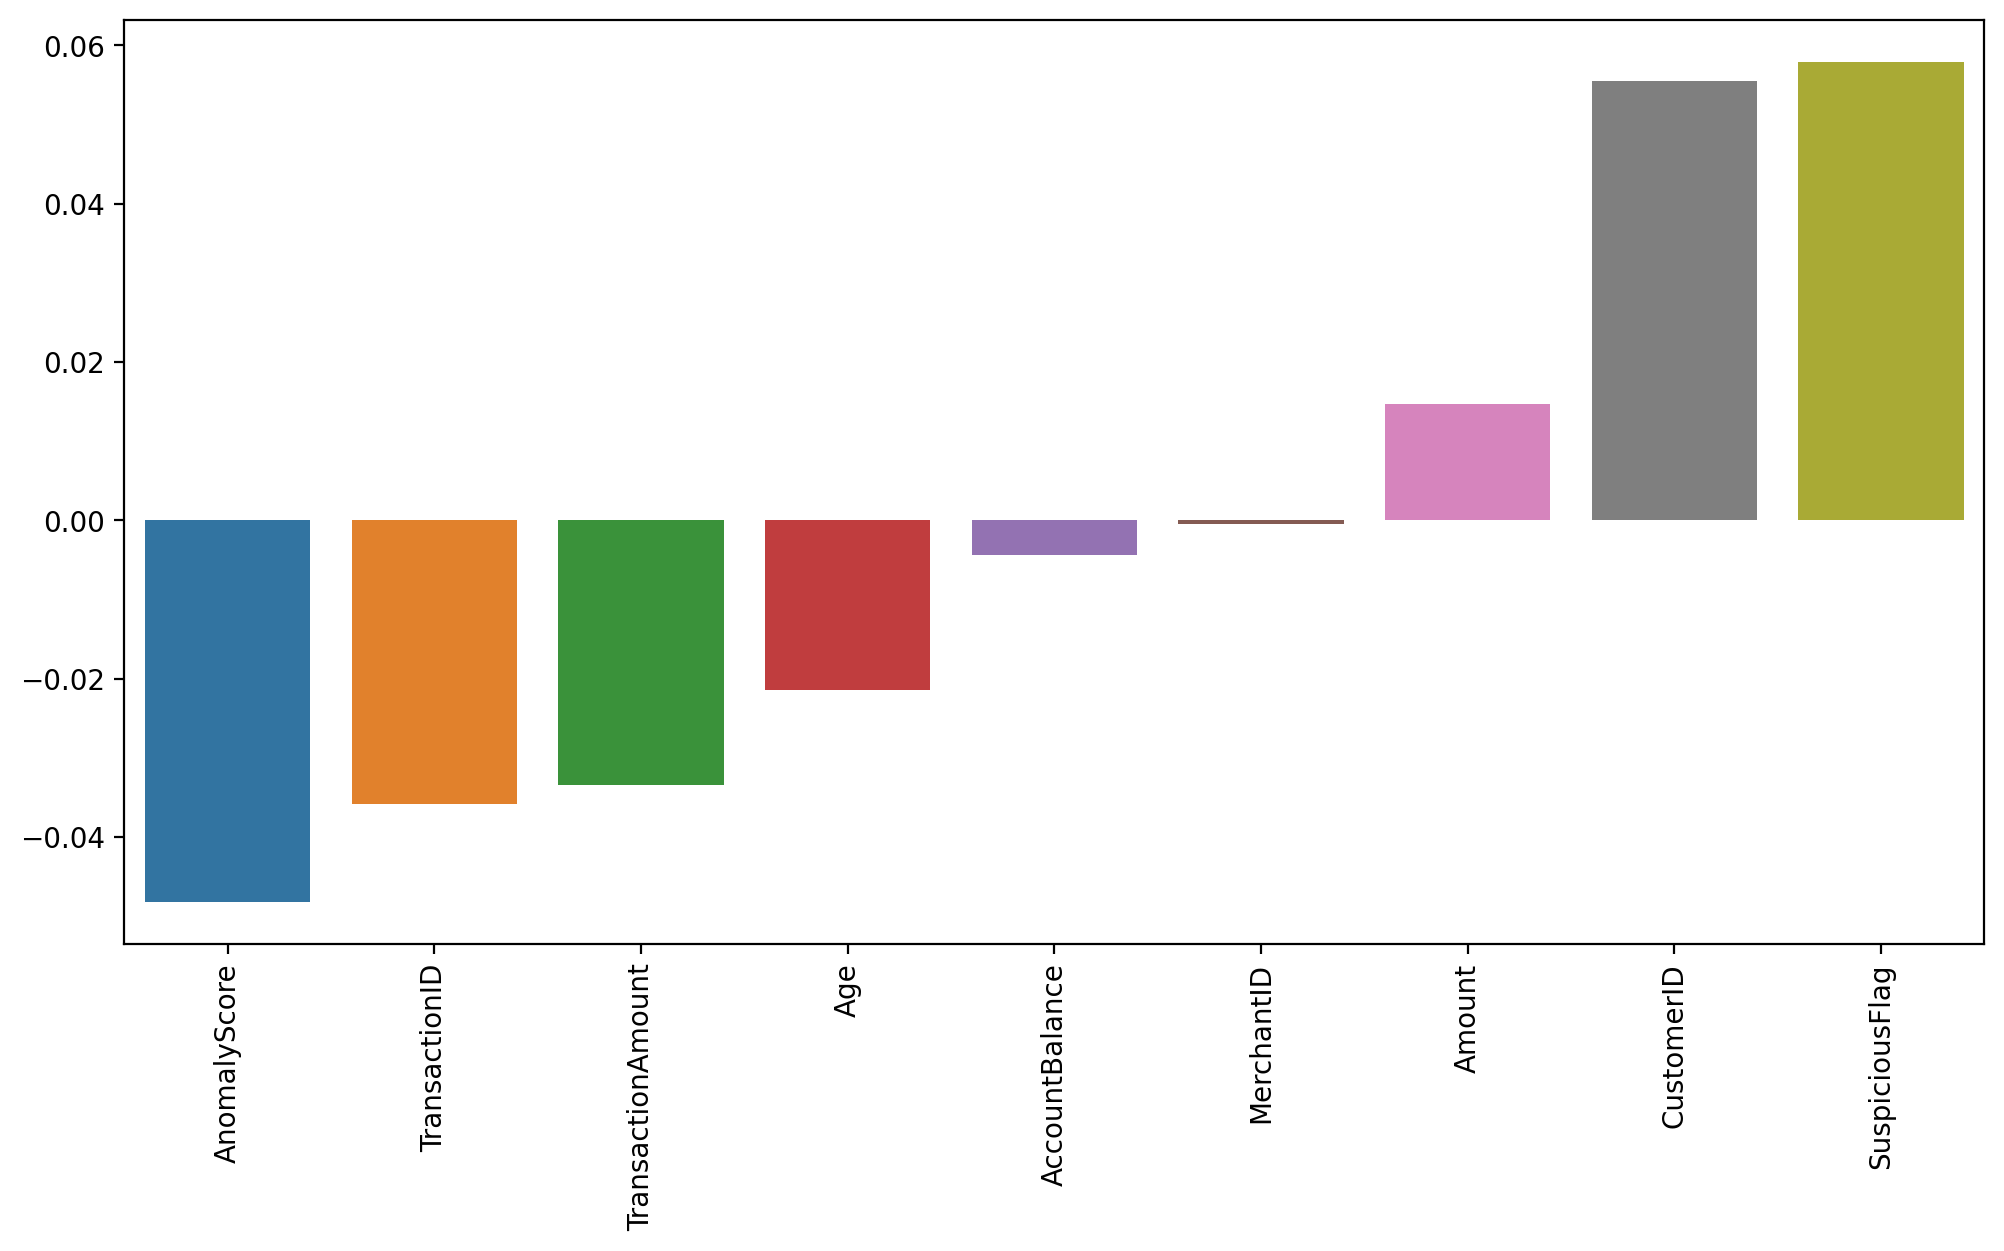

In [24]:
plt.figure(figsize=(12,6), dpi=200)
sns.barplot(x=corr.index,y= corr.values)
plt.xticks(rotation=90);


In [25]:
data1 = data.drop(["TransactionID","MerchantID","CustomerID","Name", "Age","Address", "MerchantName","Location"], axis=1)
data1 

,FraudIndicator,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag,Category_Online,Category_Other,Category_Retail,Category_Travel
0,0,79.413607,0.686699,01-01-2022 00:00,55.530334,2869.689912,2024-08-09,0,False,True,False,False
1,0,94.931704,0.856704,08-02-2022 01:00,96.523142,5359.747810,2022-01-09,0,False,True,False,False
2,0,90.422026,0.040817,07-02-2022 06:00,53.683898,2869.689912,2024-08-09,0,False,False,False,False
3,0,12.053087,0.081749,01-01-2022 01:00,12.881180,9527.947107,2022-01-27,0,True,False,False,False
4,0,96.272788,0.139599,01-02-2022 02:00,66.245435,8128.017215,2023-08-04,0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,14.161747,0.399450,10-02-2022 12:00,40.390329,4915.427164,2023-10-23,0,False,False,False,False
996,0,36.021252,0.507261,10-02-2022 19:00,59.308867,6341.743797,2023-02-25,0,False,False,False,True
997,0,34.489507,0.169398,10-02-2022 23:00,49.450072,6010.648922,2024-06-02,0,True,False,False,False
998,0,17.848481,0.029543,11-02-2022 04:00,20.443811,6018.443647,2022-11-08,0,False,False,False,False


In [26]:
data1['Timestamp'] = pd.to_datetime(data1['Timestamp'],format='%d-%m-%Y %H:%M')

In [27]:
data1['LastLogin'] = pd.to_datetime(data1['LastLogin'])

In [28]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FraudIndicator     1000 non-null   int64         
 1   TransactionAmount  1000 non-null   float64       
 2   AnomalyScore       1000 non-null   float64       
 3   Timestamp          1000 non-null   datetime64[ns]
 4   Amount             1000 non-null   float64       
 5   AccountBalance     1000 non-null   float64       
 6   LastLogin          1000 non-null   datetime64[ns]
 7   SuspiciousFlag     1000 non-null   int64         
 8   Category_Online    1000 non-null   bool          
 9   Category_Other     1000 non-null   bool          
 10  Category_Retail    1000 non-null   bool          
 11  Category_Travel    1000 non-null   bool          
dtypes: bool(4), datetime64[ns](2), float64(4), int64(2)
memory usage: 66.5 KB


In [29]:
data1['time'] = data1['Timestamp'].dt.hour
data1['interval'] = (data1['LastLogin'] - data1['Timestamp']).dt.days.abs()

In [30]:
data1

,FraudIndicator,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag,Category_Online,Category_Other,Category_Retail,Category_Travel,time,interval
0,0,79.413607,0.686699,2022-01-01 00:00:00,55.530334,2869.689912,2024-08-09,0,False,True,False,False,0,951
1,0,94.931704,0.856704,2022-02-08 01:00:00,96.523142,5359.747810,2022-01-09,0,False,True,False,False,1,31
2,0,90.422026,0.040817,2022-02-07 06:00:00,53.683898,2869.689912,2024-08-09,0,False,False,False,False,6,913
3,0,12.053087,0.081749,2022-01-01 01:00:00,12.881180,9527.947107,2022-01-27,0,True,False,False,False,1,25
4,0,96.272788,0.139599,2022-02-01 02:00:00,66.245435,8128.017215,2023-08-04,0,False,False,False,False,2,548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,14.161747,0.399450,2022-02-10 12:00:00,40.390329,4915.427164,2023-10-23,0,False,False,False,False,12,619
996,0,36.021252,0.507261,2022-02-10 19:00:00,59.308867,6341.743797,2023-02-25,0,False,False,False,True,19,379
997,0,34.489507,0.169398,2022-02-10 23:00:00,49.450072,6010.648922,2024-06-02,0,True,False,False,False,23,842
998,0,17.848481,0.029543,2022-02-11 04:00:00,20.443811,6018.443647,2022-11-08,0,False,False,False,False,4,269


In [31]:
data2 = data1.drop(["Timestamp","LastLogin"], axis=1)

In [32]:
data2 

,FraudIndicator,TransactionAmount,AnomalyScore,Amount,AccountBalance,SuspiciousFlag,Category_Online,Category_Other,Category_Retail,Category_Travel,time,interval
0,0,79.413607,0.686699,55.530334,2869.689912,0,False,True,False,False,0,951
1,0,94.931704,0.856704,96.523142,5359.747810,0,False,True,False,False,1,31
2,0,90.422026,0.040817,53.683898,2869.689912,0,False,False,False,False,6,913
3,0,12.053087,0.081749,12.881180,9527.947107,0,True,False,False,False,1,25
4,0,96.272788,0.139599,66.245435,8128.017215,0,False,False,False,False,2,548
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,14.161747,0.399450,40.390329,4915.427164,0,False,False,False,False,12,619
996,0,36.021252,0.507261,59.308867,6341.743797,0,False,False,False,True,19,379
997,0,34.489507,0.169398,49.450072,6010.648922,0,True,False,False,False,23,842
998,0,17.848481,0.029543,20.443811,6018.443647,0,False,False,False,False,4,269


In [33]:
X = data2.drop(['FraudIndicator'],axis=1)
y = data2['FraudIndicator']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import IsolationForest
# from sklearn.neighbors import LocalOutlierFactor

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay,classification_report,confusion_matrix,roc_auc_score

In [38]:
models = {
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "SVC":SVC(),
    "LogisticRegression":LogisticRegression(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier()
}
results = {}

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       280
           1       0.05      0.05      0.05        20

    accuracy                           0.87       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.87      0.87      0.87       300



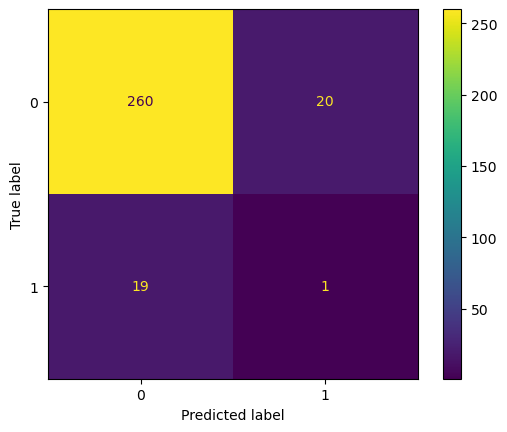

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       280
           1       0.00      0.00      0.00        20

    accuracy                           0.93       300
   macro avg       0.47      0.50      0.48       300
weighted avg       0.87      0.93      0.90       300



C:\Users\Krishna Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krishna Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krishna Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krishna Sharma\anaconda3\Lib\site-packag

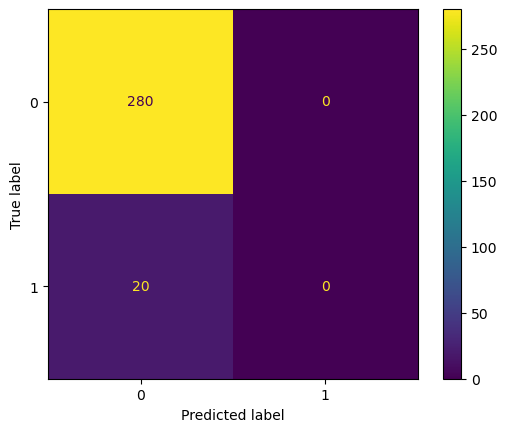

C:\Users\Krishna Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       280
           1       0.00      0.00      0.00        20

    accuracy                           0.93       300
   macro avg       0.47      0.50      0.48       300
weighted avg       0.87      0.93      0.90       300



C:\Users\Krishna Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krishna Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krishna Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


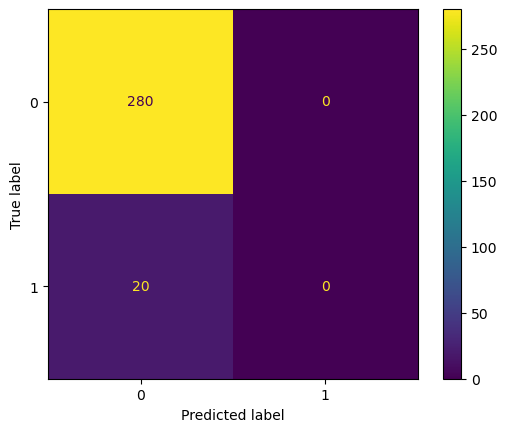

LogisticRegression
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       280
           1       0.00      0.00      0.00        20

    accuracy                           0.93       300
   macro avg       0.47      0.50      0.48       300
weighted avg       0.87      0.93      0.90       300



C:\Users\Krishna Sharma\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Krishna Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krishna Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.

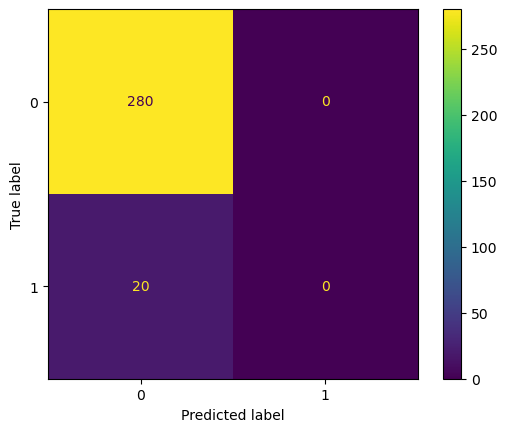

C:\Users\Krishna Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krishna Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krishna Sharma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krishna Sharma\anaconda3\Lib\site-packag

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       280
           1       0.00      0.00      0.00        20

    accuracy                           0.93       300
   macro avg       0.47      0.50      0.48       300
weighted avg       0.87      0.93      0.90       300



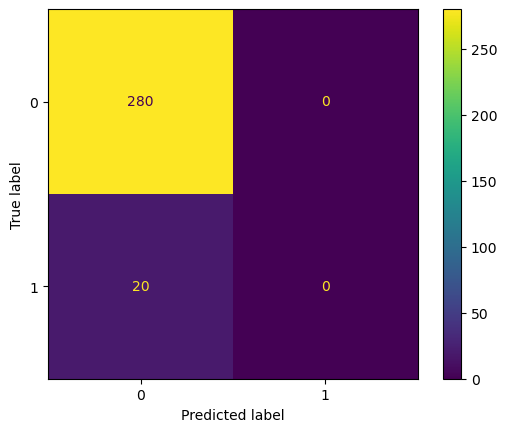

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       280
           1       0.00      0.00      0.00        20

    accuracy                           0.93       300
   macro avg       0.47      0.50      0.48       300
weighted avg       0.87      0.93      0.90       300



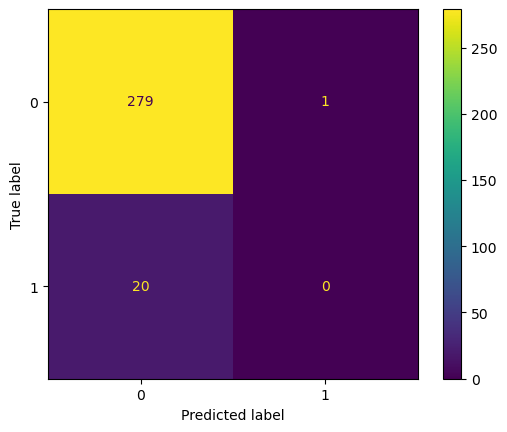

In [59]:
for name,model in models.items():
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
#     Conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Roc Auc":roc_auc
#         "Confusion Matrix": Conf_matrix
    }
    print(name)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred)).plot()
    plt.show()
    

    

In [60]:
results

{'DecisionTreeClassifier': {'Accuracy': 0.87,
  'Precision': 0.047619047619047616,
  'Recall': 0.05,
  'F1 Score': 0.04878048780487805,
  'Roc Auc': 0.4892857142857143},
 'RandomForestClassifier': {'Accuracy': 0.9333333333333333,
  'Precision': 0.0,
  'Recall': 0.0,
  'F1 Score': 0.0,
  'Roc Auc': 0.5},
 'SVC': {'Accuracy': 0.9333333333333333,
  'Precision': 0.0,
  'Recall': 0.0,
  'F1 Score': 0.0,
  'Roc Auc': 0.5},
 'LogisticRegression': {'Accuracy': 0.9333333333333333,
  'Precision': 0.0,
  'Recall': 0.0,
  'F1 Score': 0.0,
  'Roc Auc': 0.5},
 'KNeighborsClassifier': {'Accuracy': 0.9333333333333333,
  'Precision': 0.0,
  'Recall': 0.0,
  'F1 Score': 0.0,
  'Roc Auc': 0.5},
 'GradientBoostingClassifier': {'Accuracy': 0.93,
  'Precision': 0.0,
  'Recall': 0.0,
  'F1 Score': 0.0,
  'Roc Auc': 0.4982142857142857}}

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
smote = SMOTE(random_state=101)
X_resampled, y_resampled = smote.fit_resample(X,y)


DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       1.00      1.00      1.00        20

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



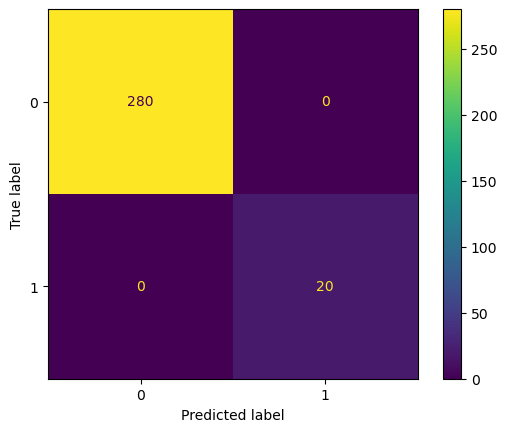

RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       1.00      1.00      1.00        20

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



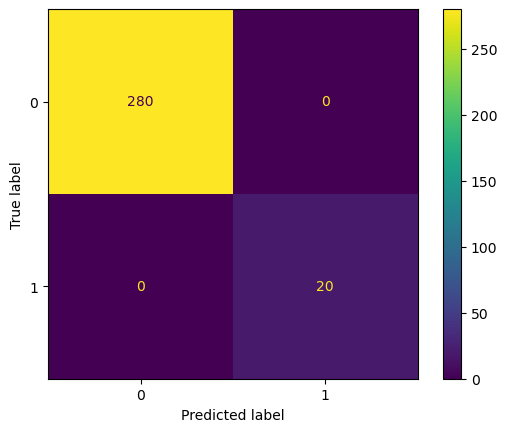

SVC
              precision    recall  f1-score   support

           0       0.97      0.67      0.79       280
           1       0.13      0.70      0.22        20

    accuracy                           0.67       300
   macro avg       0.55      0.68      0.51       300
weighted avg       0.91      0.67      0.75       300



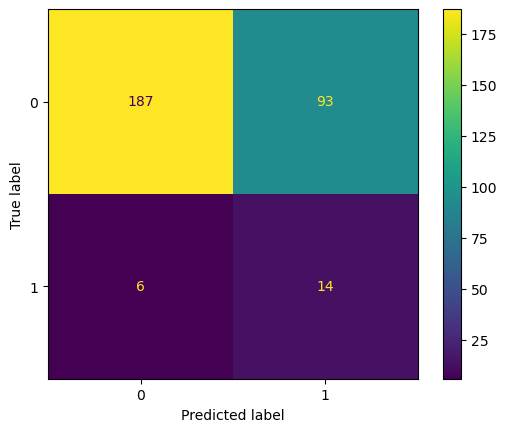

LogisticRegression
              precision    recall  f1-score   support

           0       0.94      0.67      0.78       280
           1       0.09      0.45      0.15        20

    accuracy                           0.65       300
   macro avg       0.52      0.56      0.46       300
weighted avg       0.89      0.65      0.74       300



C:\Users\Krishna Sharma\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


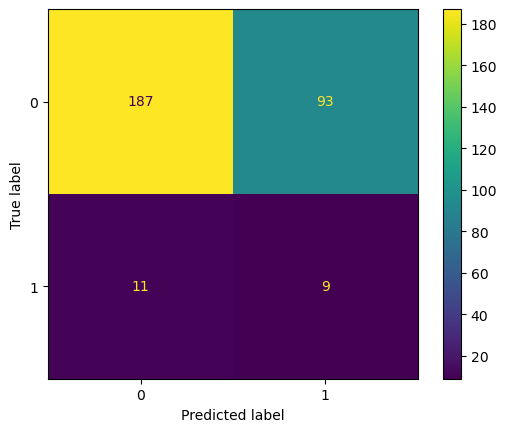

KNeighborsClassifier
              precision    recall  f1-score   support

           0       1.00      0.81      0.89       280
           1       0.26      0.95      0.41        20

    accuracy                           0.82       300
   macro avg       0.63      0.88      0.65       300
weighted avg       0.95      0.82      0.86       300



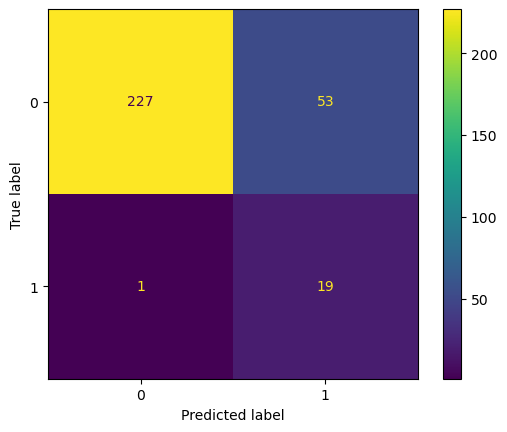

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       280
           1       0.42      0.80      0.55        20

    accuracy                           0.91       300
   macro avg       0.70      0.86      0.75       300
weighted avg       0.95      0.91      0.93       300



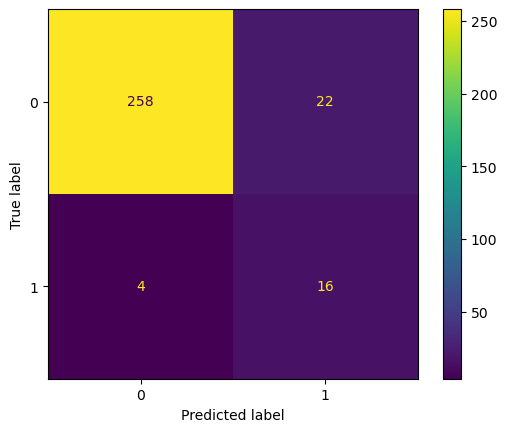

In [61]:
for name,model in models.items():
    
    model.fit(X_resampled,y_resampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Roc Auc":roc_auc
        
    }
    print(name)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred)).plot()
    plt.show()
    

    

In [62]:
results

{'DecisionTreeClassifier': {'Accuracy': 1.0,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1 Score': 1.0,
  'Roc Auc': 1.0},
 'RandomForestClassifier': {'Accuracy': 1.0,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1 Score': 1.0,
  'Roc Auc': 1.0},
 'SVC': {'Accuracy': 0.67,
  'Precision': 0.1308411214953271,
  'Recall': 0.7,
  'F1 Score': 0.22047244094488186,
  'Roc Auc': 0.6839285714285714},
 'LogisticRegression': {'Accuracy': 0.6533333333333333,
  'Precision': 0.08823529411764706,
  'Recall': 0.45,
  'F1 Score': 0.1475409836065574,
  'Roc Auc': 0.5589285714285714},
 'KNeighborsClassifier': {'Accuracy': 0.82,
  'Precision': 0.2638888888888889,
  'Recall': 0.95,
  'F1 Score': 0.41304347826086957,
  'Roc Auc': 0.8803571428571428},
 'GradientBoostingClassifier': {'Accuracy': 0.9133333333333333,
  'Precision': 0.42105263157894735,
  'Recall': 0.8,
  'F1 Score': 0.5517241379310345,
  'Roc Auc': 0.8607142857142859}}

In [46]:
len(X.columns)

11

In [49]:
n_inputs = 11
data2["FraudIndicator"].value_counts()


FraudIndicator
0    955
1     45
Name: count, dtype: int64

In [50]:
weights = {0:1, 1:21}

In [55]:
X_train1 = np.asarray(X_train).astype(np.float32)
y_train1 = np.asarray(y_train).astype(np.float32)
X_test1 = np.asarray(X_test).astype(np.float32)
y_test1 = np.asarray(y_test).astype(np.float32)

In [54]:
model = Sequential()
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train1, y_train1,epochs=10, class_weight=weights)

Epoch 1/10

22/22 [==============================] - 1s 4ms/step - loss: 761.2917
Epoch 2/10
22/22 [==============================] - 0s 4ms/step - loss: 127.6701
Epoch 3/10
22/22 [==============================] - 0s 4ms/step - loss: 82.7779
Epoch 4/10
22/22 [==============================] - 0s 3ms/step - loss: 57.8407
Epoch 5/10
22/22 [==============================] - 0s 3ms/step - loss: 31.7504
Epoch 6/10
22/22 [==============================] - 0s 3ms/step - loss: 16.5488
Epoch 7/10
22/22 [==============================] - 0s 3ms/step - loss: 17.6498
Epoch 8/10
22/22 [==============================] - 0s 3ms/step - loss: 24.0268
Epoch 9/10
22/22 [==============================] - 0s 3ms/step - loss: 10.2695
Epoch 10/10
22/22 [==============================] - 0s 3ms/step - loss: 12.0404


In [56]:
y_pred = model.predict(X_test1)

10/10 [==============================] - 0s 6ms/step


In [57]:
from sklearn.metrics import roc_auc_score

In [64]:
print("Artificial Neural Network")
print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"precision: {precision_score(y_test, y_pred)}")
print(f"recall: {recall_score(y_test, y_pred)}")
print(f"f1: {f1_score(y_test, y_pred)}")
print(f"roc_auc: {roc_auc_score(y_test, y_pred)}")


Artificial Neural Network
accuracy 0.9133333333333333
precision 0.42105263157894735
recall 0.8
f1 0.5517241379310345
roc_auc 0.8607142857142859
